# Task
## Detecting Anomalies in Wafer Manufacturing
### Detecting Anomalies using Machine Learning

## Task Description:
###  A manufacturer hardly wants to create an anomalous product. However, the anomalous products are like a needle in a haystack. In this task, we will be creating machine learning models to help India's leading manufacturers of wafers(semiconductors) find the anomalous products. The dataset collected was anonymized to hide the feature names, also there are 1558 features that would require some serious domain knowledge to understand them. We do not care about what the features arem we just want to use this features to detect the anomalous products.

### One important thins is that this dataset is significantly Imbalanced. We should think about how to address the imbalanced challenge and what metric we should use to evaluate our models. 

## Dataset Description:
### Train.csv - 1763 rows x 1559 columns

## Attribute Description:
### Feature1 - Feature1558 - Represents the various attributes that were collected from the manufacturing machine.
### Class - (0 or 1) - Represents Good/Anomalous class labels for the products

## Skills: 
### High Dimensionality 
### Overfitting-vs-Underfitting
### Advanced Classification Techniques

In [1]:
import numpy as np
import pandas as pd

In [2]:
import time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
from sklearn.utils import resample 

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Read Data

In [9]:
train = pd.read_csv('Train.csv')
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [11]:
train["Class"].value_counts()

0    1620
1     143
Name: Class, dtype: int64

## What can we get now?

### 1. High dimentsion (1558 features). 
### 2. Imbalance (1620:143)

## Pre-processing

### 1. Are there any NA values?

In [12]:
# df_check=df.isnull()
# print(df_check)
train.isnull().values.any()

False

### 2. Are ther any features with only 0s?

In [13]:
df = pd.DataFrame((train == 0).astype(int).sum(axis=0))

In [14]:
df

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,486
feature_5,1758
...,...
feature_1555,1736
feature_1556,1737
feature_1557,1746
feature_1558,1761


In [15]:
all_zero = df[df[0]>1762].index

In [16]:
all_zero

Index(['feature_57', 'feature_82', 'feature_106', 'feature_147', 'feature_262',
       'feature_278', 'feature_284', 'feature_320', 'feature_362',
       'feature_372', 'feature_383', 'feature_435', 'feature_439',
       'feature_488', 'feature_495', 'feature_522', 'feature_531',
       'feature_553', 'feature_578', 'feature_591', 'feature_630',
       'feature_631', 'feature_652', 'feature_894', 'feature_934',
       'feature_978', 'feature_1038', 'feature_1063', 'feature_1096',
       'feature_1185', 'feature_1211', 'feature_1243', 'feature_1247',
       'feature_1341', 'feature_1367', 'feature_1407'],
      dtype='object')

In [17]:
train.drop(all_zero,axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1523 entries, feature_1 to Class
dtypes: float64(1), int64(1522)
memory usage: 20.5 MB


### 3. Normalization or Standardization?

In [19]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,...,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,...,0.062905,0.075121,0.053194,0.062905,0.062905,0.122837,0.120575,0.097750,0.033672,0.273084
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,33.500000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,96.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,159.000000,4.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X= train.drop(["Class"], axis=1)
y= train["Class"]

#### You can decide whether to do Normalization, or Standardization, or MinMaxScaler.

In [21]:
# ss=StandardScaler()
# X=ss.fit_transform(X)

### Start training

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=7)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1234, 1522), (529, 1522), (1234,), (529,))

In [24]:
y_train.value_counts(), y_test.value_counts()

(0    1120
 1     114
 Name: Class, dtype: int64,
 0    500
 1     29
 Name: Class, dtype: int64)

In [25]:
pipelines = []

#### Some classifiers may have some default parameter settings. You can check and find the optimal settings. 

In [26]:
pipelines.append(('LR', Pipeline([('LR',LogisticRegression(max_iter=1000))])))
pipelines.append(('Lasso', Pipeline([('Lasso',Lasso())])))
pipelines.append(('Ridge', Pipeline([('Ridge',Ridge())])))
pipelines.append(('NB', Pipeline([('NB',GaussianNB())])))
pipelines.append(('KNN', Pipeline([('KNN',KNeighborsClassifier(n_neighbors=3))])))
pipelines.append(('DCT', Pipeline([('DCT',DecisionTreeClassifier())])))
pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Ada',AdaBoostClassifier())])))
pipelines.append(('SVM', Pipeline([('SVM',SVC())])))

#### KFold
#### Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#### Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [27]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.893023 (0.064814)
Lasso: 0.701762 (0.121900)
Ridge: 0.855915 (0.084507)
NB: 0.679044 (0.052883)
KNN: 0.768243 (0.062761)
DCT: 0.661670 (0.064231)
RF: 0.911351 (0.053562)
Ada: 0.844926 (0.095464)
SVM: 0.818142 (0.088429)


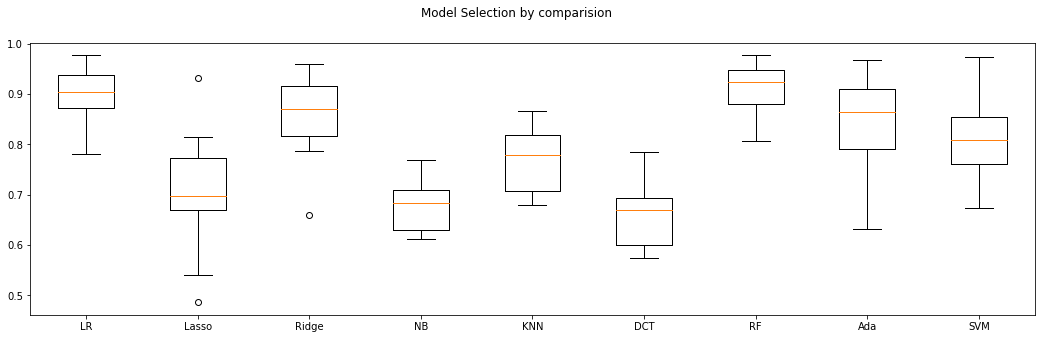

In [28]:
# Algorithm comparison
fig = plt.figure(figsize=(18,5))
fig.suptitle('Model Selection by comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### PCA for Dimensionality Reduction

#### Principal Component Analysis is that technique which is used to reduce the dimensionality of the Dataset. In short it is used to reduce the number of columns in a dataset. 

#### In short these  principal components helps us to represent our high dimensional data with equivalent information on a lower dimension space. PCA is a very popular technique in Dimensionality reduction. We would try to use PCA on our Dataset and also try to use T-sne algorithm to visualize our reduced dataset.

In [29]:
pca = PCA(n_components=3, random_state=52)

In [30]:
pca_result = pca.fit_transform(X)

In [31]:
print(pca.explained_variance_ratio_)

[8.66775545e-01 1.32078413e-01 5.75164405e-04]


In [32]:
print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 3 principal components: 0.9994291226426613


In [33]:
train_copy = train.copy()
train_copy['pca-one'] = pca_result[:,0]
train_copy['pca-two'] = pca_result[:,1] 
train_copy['pca-three'] = pca_result[:,2]

In [34]:
rndperm = np.random.permutation(train_copy.shape[0])

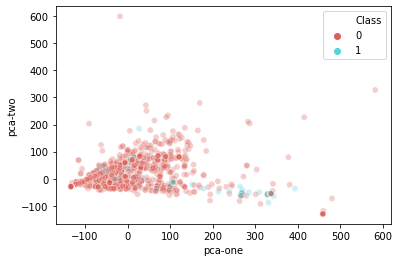

In [35]:
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data= train_copy.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

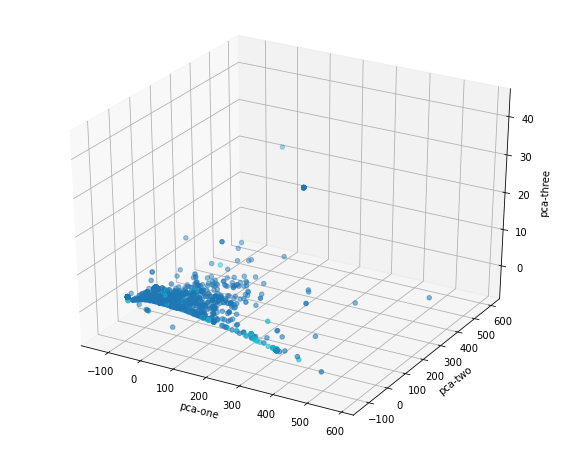

In [36]:
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(
    xs=train_copy.loc[rndperm,:]["pca-one"], 
    ys=train_copy.loc[rndperm,:]["pca-two"], 
    zs=train_copy.loc[rndperm,:]["pca-three"], 
    c=train_copy.loc[rndperm,:]["Class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### t-SNE

#### t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

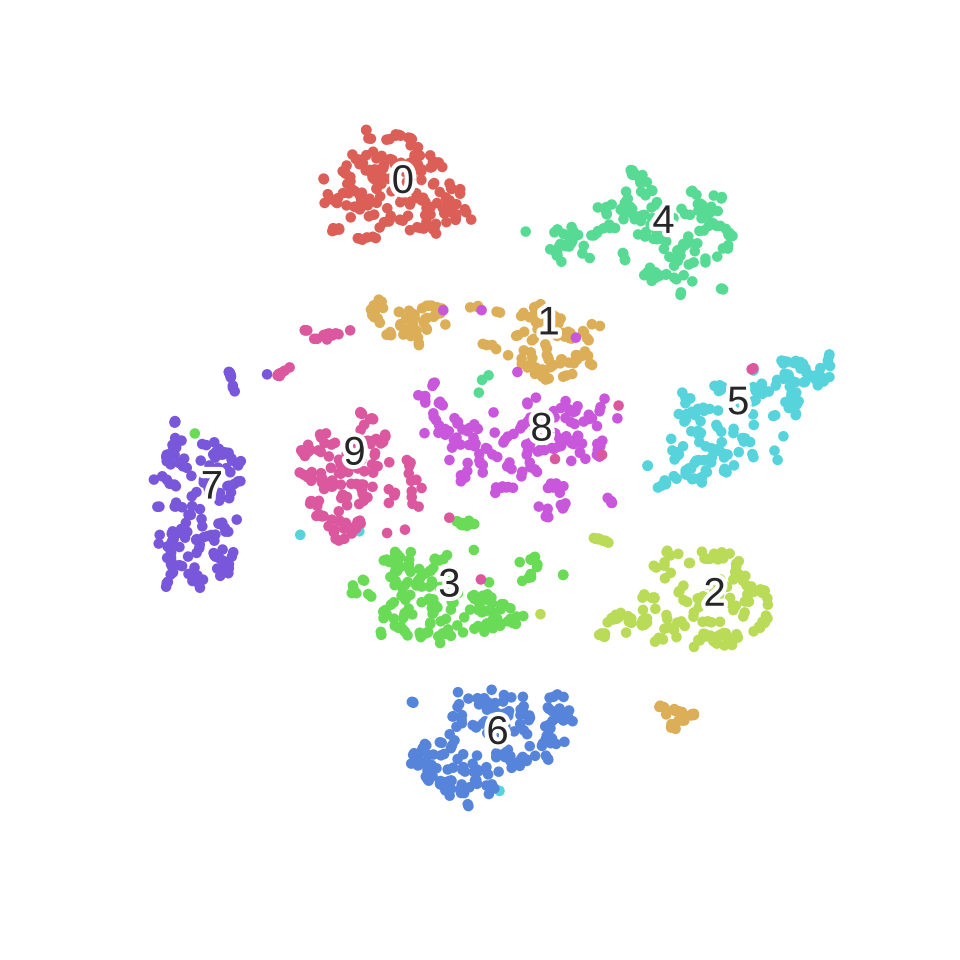

#### How to Use t-SNE Effectively https://distill.pub/2016/misread-tsne/

In [37]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1763 samples in 0.119s...
[t-SNE] Computed neighbors for 1763 samples in 1.974s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1763
[t-SNE] Computed conditional probabilities for sample 1763 / 1763
[t-SNE] Mean sigma: 2.357677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.766201
[t-SNE] KL divergence after 300 iterations: 0.682918
t-SNE done! Time elapsed: 4.586571931838989 seconds


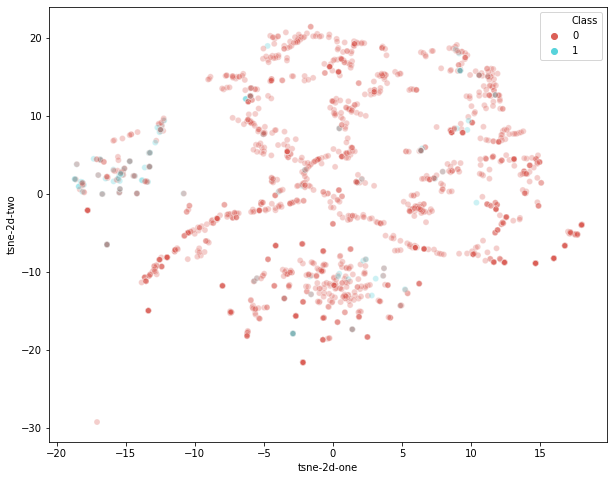

In [38]:
train_copy['tsne-2d-one'] = tsne_results[:,0]
train_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3
)

### Using PCA and t-SNE together
#### We will now use the reduced dimensions from the PCA to visualize the data using t-SNE.

In [39]:
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9994291226426619


In [40]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_pca_results = tsne.fit_transform(pca_result_3)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 6.880192041397095 seconds


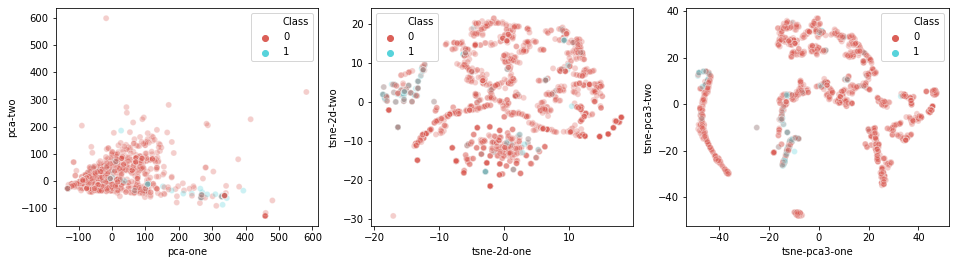

In [41]:
train_copy['tsne-pca3-one'] = tsne_pca_results[:,0]
train_copy['tsne-pca3-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca3-one", y="tsne-pca3-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [42]:
pca_X = pca_result_3
pca_y = y 

In [43]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test= train_test_split(pca_X, pca_y, test_size=0.3, random_state=7)

In [44]:
pca_X_train.shape, pca_X_test.shape, pca_y_train.shape, pca_y_test.shape

((1234, 3), (529, 3), (1234,), (529,))

In [45]:
pca_y_train.value_counts(), pca_y_test.value_counts()

(0    1120
 1     114
 Name: Class, dtype: int64,
 0    500
 1     29
 Name: Class, dtype: int64)

In [46]:
pca_pipelines = []

In [47]:
pca_pipelines.append(('pca_LR', Pipeline([('pca_LR',LogisticRegression(max_iter=1000))])))
pca_pipelines.append(('pca_Lasso', Pipeline([('pca_Lasso',Lasso())])))
pca_pipelines.append(('pca_Ridge', Pipeline([('pca_Ridge',Ridge())])))
pca_pipelines.append(('pca_NB', Pipeline([('pca_NB',GaussianNB())])))
pca_pipelines.append(('pca_KNN', Pipeline([('pca_KNN',KNeighborsClassifier(n_neighbors=3))])))
pca_pipelines.append(('pca_DCT', Pipeline([('pca_DCT',DecisionTreeClassifier())])))
pca_pipelines.append(('pca_RF', Pipeline([('pca_RF',RandomForestClassifier())])))
pca_pipelines.append(('pca_Ada', Pipeline([('pca_Ada',AdaBoostClassifier())])))
pca_pipelines.append(('pca_SVM', Pipeline([('pca_SVM',SVC())])))

In [48]:
pca_results = []
pca_names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, pca_X_train, pca_y_train, cv=kfold, scoring='roc_auc')
    pca_results.append(cv_results)
    pca_names.append(name)
    pca_msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(pca_msg)

LR: 0.756837 (0.083239)
Lasso: 0.711987 (0.115772)
Ridge: 0.729701 (0.109214)
NB: 0.784147 (0.081917)
KNN: 0.828654 (0.065188)
DCT: 0.649768 (0.053804)
RF: 0.868570 (0.035205)
Ada: 0.856262 (0.062937)
SVM: 0.692943 (0.148468)


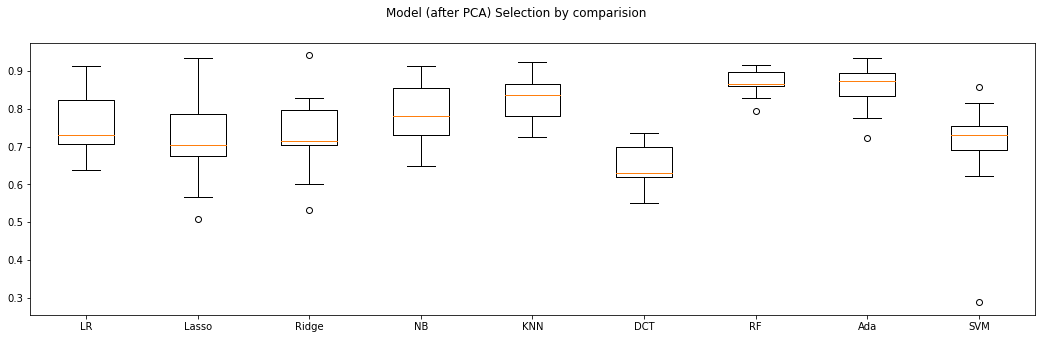

In [49]:
# Algorithm comparison
fig = plt.figure(figsize=(18,5))
fig.suptitle('Model (after PCA) Selection by comparision')
ax = fig.add_subplot(111)
plt.boxplot(pca_results)
ax.set_xticklabels(pca_names)
plt.show()

### Resampling
#### Resampling is the method that consists of drawing repeated samples from the original data samples.

### 1. Up-sampling
#### Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.
### 2. Down-sampling
#### Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

#### First, we'll separate observations from each class into different DataFrames.

In [50]:
maj_class=train[train["Class"]==0]
min_class=train[train["Class"]==1]

#### Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class

In [51]:
resamp_minclass=resample(min_class,n_samples=1620,replace=True,random_state=42)

#### Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [52]:
train_new= pd.concat([maj_class,resamp_minclass])
train_new.shape

(3240, 1523)

In [53]:
train_new["Class"].value_counts()

1    1620
0    1620
Name: Class, dtype: int64

In [54]:
res_X= train_new.drop(["Class"], axis=1)
res_y= train_new["Class"]

In [55]:
res_X_train_, res_X_test, res_y_train, res_y_test= train_test_split(res_X, res_y, test_size=0.3, random_state=7)

In [56]:
res_X_train_.shape, res_X_test.shape, res_y_train.shape, res_y_test.shape

((2268, 1522), (972, 1522), (2268,), (972,))

In [57]:
res_y_train.value_counts(), res_y_test.value_counts()

(1    1134
 0    1134
 Name: Class, dtype: int64,
 1    486
 0    486
 Name: Class, dtype: int64)

In [58]:
res_pipelines = []

In [59]:
res_pipelines.append(('res_LR', Pipeline([('res_LR',LogisticRegression(max_iter=1000))])))
res_pipelines.append(('res_Lasso', Pipeline([('res_Lasso',Lasso())])))
res_pipelines.append(('res_Ridge', Pipeline([('res_Ridge',Ridge())])))
res_pipelines.append(('res_NB', Pipeline([('res_NB',GaussianNB())])))
res_pipelines.append(('res_KNN', Pipeline([('res_KNN',KNeighborsClassifier(n_neighbors=3))])))
res_pipelines.append(('res_DCT', Pipeline([('res_DCT',DecisionTreeClassifier())])))
res_pipelines.append(('res_RF', Pipeline([('res_RF',RandomForestClassifier())])))
res_pipelines.append(('res_Ada', Pipeline([('res_Ada',AdaBoostClassifier())])))
res_pipelines.append(('res_SVM', Pipeline([('res_SVM',SVC())])))

In [60]:
res_results = []
res_names = []
for name, model in res_pipelines:
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    res_results.append(cv_results)
    res_names.append(name)
    res_msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(res_msg)

res_LR: 0.893023 (0.064814)
res_Lasso: 0.701762 (0.121900)
res_Ridge: 0.855915 (0.084507)
res_NB: 0.679044 (0.052883)
res_KNN: 0.768243 (0.062761)
res_DCT: 0.660585 (0.052743)
res_RF: 0.919136 (0.046052)
res_Ada: 0.844926 (0.095464)
res_SVM: 0.818142 (0.088429)


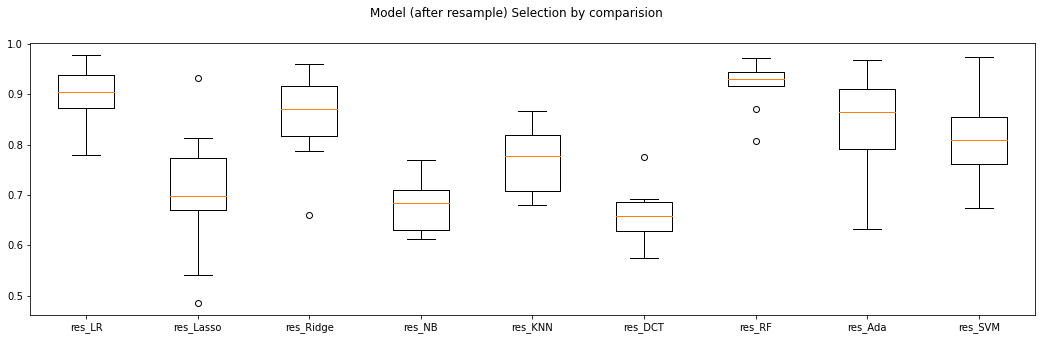

In [61]:
# Algorithm comparison
fig = plt.figure(figsize=(18,5))
fig.suptitle('Model (after resample) Selection by comparision')
ax = fig.add_subplot(111)
plt.boxplot(res_results)
ax.set_xticklabels(res_names)
plt.show()

### Resampling and PCA

In [62]:
pca_3 = PCA(n_components=3)
pca_res_result_3 = pca_3.fit_transform(res_X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9995777780991002


In [63]:
pca_res_X = pca_res_result_3
pca_res_y = res_y 

In [64]:
pca_res_X_train, pca_res_X_test, pca_res_y_train, pca_res_y_test= train_test_split(pca_res_X, pca_res_y, test_size=0.3, random_state=7)

In [65]:
pca_res_X_train.shape, pca_res_X_test.shape, pca_res_y_train.shape, pca_res_y_test.shape

((2268, 3), (972, 3), (2268,), (972,))

In [66]:
pca_res_y_train.value_counts(), pca_res_y_test.value_counts()

(1    1134
 0    1134
 Name: Class, dtype: int64,
 1    486
 0    486
 Name: Class, dtype: int64)

In [67]:
pca_res_pipelines = []

In [68]:
pca_res_pipelines.append(('pca_res_LR', Pipeline([('pca_res_LR',LogisticRegression(max_iter=1000))])))
pca_res_pipelines.append(('pca_res_Lasso', Pipeline([('pca_res_Lasso',Lasso())])))
pca_res_pipelines.append(('pca_res_Ridge', Pipeline([('pca_res_Ridge',Ridge())])))
pca_res_pipelines.append(('pca_res_NB', Pipeline([('pca_res_NB',GaussianNB())])))
pca_res_pipelines.append(('pca_res_KNN', Pipeline([('pca_res_KNN',KNeighborsClassifier(n_neighbors=3))])))
pca_res_pipelines.append(('pca_res_DCT', Pipeline([('pca_res_DCT',DecisionTreeClassifier())])))
pca_res_pipelines.append(('pca_res_RF', Pipeline([('pca_res_RF',RandomForestClassifier())])))
pca_res_pipelines.append(('pca_res_Ada', Pipeline([('pca_res_Ada',AdaBoostClassifier())])))
pca_res_pipelines.append(('pca_res_SVM', Pipeline([('pca_res_SVM',SVC())])))

In [69]:
pca_res_results = []
pca_res_names = []
for name, model in res_pipelines:
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, pca_res_X_train, pca_res_y_train, cv=kfold, scoring='roc_auc')
    pca_res_results.append(cv_results)
    pca_res_names.append(name)
    pca_res_msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(pca_res_msg)

res_LR: 0.786753 (0.026806)
res_Lasso: 0.740817 (0.031810)
res_Ridge: 0.775438 (0.027564)
res_NB: 0.788346 (0.027906)
res_KNN: 0.960737 (0.019815)
res_DCT: 0.958936 (0.015509)
res_RF: 0.989445 (0.006304)
res_Ada: 0.913876 (0.017853)
res_SVM: 0.823652 (0.020568)


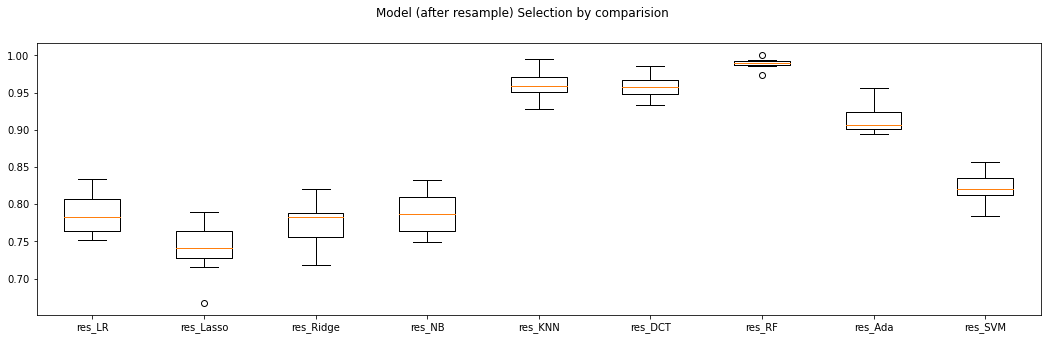

In [70]:
# Algorithm comparison
fig = plt.figure(figsize=(18,5))
fig.suptitle('Model (after resample) Selection by comparision')
ax = fig.add_subplot(111)
plt.boxplot(pca_res_results)
ax.set_xticklabels(pca_res_names)
plt.show()

### Which one has best performance among these classifiers?

#### Rnadom Forest (tree ensembles)

#### Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

## There is no free lunch threorem, and you should try several of them and use the results from the test set to decide on the best solution for your problem

## Test 

In [71]:
pca_res_RF = RandomForestClassifier()
kfold = KFold(n_splits=10 ,random_state =None , shuffle = False)

In [72]:
pca_res_RF.fit(pca_res_X_train,pca_res_y_train)

RandomForestClassifier()

In [73]:
predictions = pca_res_RF.predict_proba(pca_res_X_test)[:, -1]

In [74]:
score = roc_auc_score(pca_res_y_test,predictions)
score

0.990355467493099

In [83]:
#Random Forest
RandomForest = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
RandomForest.fit(X_train, y_train)
predictions = RF.predict_proba(X_test)[:, -1]
scoreRF = roc_auc_score(y_test, predictions)
print(scoreRF)

#Decision Tree
DecisionTree = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
DecisionTree.fit(X_train, y_train)
predictions = DC.predict_proba(X_test)[:, -1]
scoreDC = roc_auc_score(y_test, predictions)
print(scoreDC)


if scoreDC > scoreRF:
    print("Decision Tree is Better")
else:
    print("Random Forest is Better")

0.8849655172413794
0.6399999999999999
Random Forest is Better
